<a href="https://colab.research.google.com/github/danielelbrecht/CAP5610-HW-1/blob/master/CAP5610_HW1Problem3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Single layer digit classifier using softmax activation and categorical cross entropy loss

In [0]:
#Import data
import numpy as np
import sklearn
from keras.datasets import mnist

#Load data
(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

In [0]:
#Preprocess data
train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255



#Use one-hot encoding
from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

In [0]:


#Returns the ativations for an entire mini batch
def softmax(weights, bias, data):
  
  activations = []
  
  for i in range(len(data)):
    total = 0
    temp = []
    for j in range(10):
      total = total + np.exp(np.dot(weights[j], data[i])+bias[j])
      temp.append(np.exp(np.dot(weights[j], data[i])+bias[j]))
    temp = temp / total
    activations.append(temp)
    
  return activations
  
  


#gradient function for softmax activation with log loss = y(a-k)*X
def gradient(weights, bias, x, y):
  
  batch_size = len(x)
  
  #Generate matrix for Kronecker delta
  KD = np.zeros(shape = (10,10))
  for i in range(10):
    KD[i][i] = 1
    
  z = [0,0,0,0,0,0,0,0,0,0]
  
  #Get softmax activations for batch
  activations = softmax(weights, bias,  x) 
   
  #Iterate over each training example in batch
  for i in range(batch_size):
    
    #Iterate over each neuron
    for j in range(10):
      
      total = 0
      #Iterate over each activation
      for k in range(10):
        total = total + y[i][k]*(activations[i][j] - KD[j][k])
        
      z[j] = z[j] + total
  
  #Take average of batch
  for i in range(10):
    z[i] = z[i] / batch_size
  
  #Now calculate dL/dW
  gradient = np.zeros(shape = (10,784))
  
  for i in range(batch_size):
    for j in range(10):
      for k in range(784):
        gradient[j][k] = gradient[j][k] + (x[i][k] / batch_size) * z[j]
  
  return gradient, np.asarray(z)
  
  



#Calculat cce loss
def cce_loss(weights, bias, x, y):
  
  length = len(y)
  loss = 0.0
  predictions = softmax(weights, bias, x)
  
  for i in range(length):
    temp = 0.0
    for j in range(10):
      temp = temp + y[i][j] * np.log(predictions[i][j])
      
    loss = loss - temp
      
  return loss / float(length)

In [0]:
import random



#Initialize weight matrix
#w[0][50] represents the 50th weight of the 0th neuron
weights = []
bias = []

for i in range(10):
  weights.append([])
  bias.append(random.random()-0.5)
  for j in range(784):
    weights[i].append(random.random()-0.5)
    

In [55]:
#Training

#Define hyperparameters
epochs = 1
batch_size = 500
learning_rate = 0.02
length = 30000


loss_history = []

#Iterate over epochs
for i in range(epochs):
  
  #Iterate over mini batches
  for j in range(int(length/batch_size)):
    
    
    #get mini batch
    data = train_images[batch_size*j:min(length, batch_size*(j+1))]
    labels = train_labels[batch_size*j:min(length, batch_size*(j+1))]
    
    #Update weights and bias
    weight_gradient, bias_gradient = gradient(weights, bias, data, labels)
    weights = weights - learning_rate*weight_gradient
    bias = bias - learning_rate*bias_gradient
    
    print("Mini batch %i complete" % j)
    
    #measure loss after every 2,000 data points
    if batch_size * j % 2000 == 0:
      loss = cce_loss(weights, bias, train_images, train_labels)
      
      print("Training loss %f" % loss)
      loss_history.append(loss)
      
  print('Epoch %i complete' % i)

Mini batch 0 complete
Training loss 4.817902
Mini batch 1 complete
Mini batch 2 complete
Mini batch 3 complete
Mini batch 4 complete
Training loss 4.571591
Mini batch 5 complete
Mini batch 6 complete
Mini batch 7 complete
Mini batch 8 complete
Training loss 4.399557
Mini batch 9 complete
Mini batch 10 complete
Mini batch 11 complete
Mini batch 12 complete
Training loss 4.254659
Mini batch 13 complete
Mini batch 14 complete
Mini batch 15 complete
Mini batch 16 complete
Training loss 4.163795
Mini batch 17 complete
Mini batch 18 complete
Mini batch 19 complete
Mini batch 20 complete
Training loss 4.097169
Mini batch 21 complete
Mini batch 22 complete
Mini batch 23 complete
Mini batch 24 complete
Training loss 4.043990
Mini batch 25 complete
Mini batch 26 complete
Mini batch 27 complete
Mini batch 28 complete
Training loss 4.005155
Mini batch 29 complete
Mini batch 30 complete
Mini batch 31 complete
Mini batch 32 complete
Training loss 3.986063
Mini batch 33 complete
Mini batch 34 complet

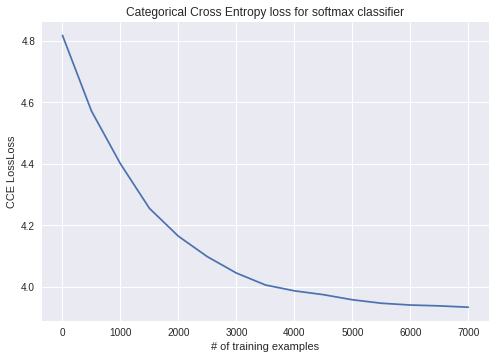

In [56]:
#plot loss

import matplotlib as mpl
import matplotlib.pyplot as plt

index = []
for i in range(len(loss_history)):
  index.append(i* batch_size)

plt.plot(index, loss_history)
plt.xlabel("# of training examples")
plt.ylabel("CCE LossLoss")
plt.title("Categorical Cross Entropy loss for softmax classifier")
plt.show()